In [1]:
# Importing all the libraries required to study the data-set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing all test to test the dependence between the features
from scipy.stats import f_oneway # One-Way ANOVA.
from scipy.stats import chi2_contingency # chi-square test
%matplotlib inline

In [2]:
# Importing the data-set
df = pd.read_csv("Brick_strength.csv")

In [3]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(1005, 9)

In [9]:
df1 = df.copy()

In [10]:
df1.drop('strength',axis = 1, inplace = True)

In [11]:
df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [12]:
df1.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


<AxesSubplot:>

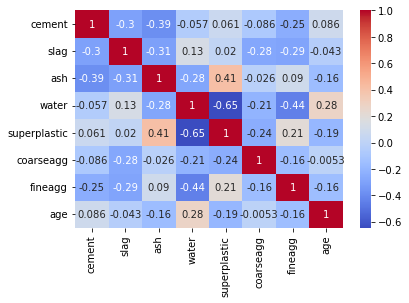

In [13]:
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')

(array([ 63., 171., 151., 154., 144., 109.,  93.,  46.,  34.,  40.]),
 array([102. , 145.8, 189.6, 233.4, 277.2, 321. , 364.8, 408.6, 452.4,
        496.2, 540. ]),
 <BarContainer object of 10 artists>)

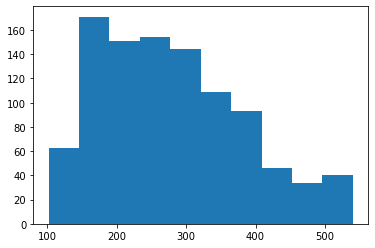

In [14]:
plt.hist(df.cement)

In [15]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [16]:
l = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']
for x in l:
    df[x].replace(0,df[x].mean(),inplace = True)

In [17]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.000000,55.536318,203.5,6.033234,971.8,748.5,28,29.89
1,168.9,42.200000,124.300000,158.3,10.800000,1080.8,796.2,14,23.51
2,250.0,72.043483,95.700000,187.4,5.500000,956.9,861.2,28,29.22
3,266.0,114.000000,55.536318,228.0,6.033234,932.0,670.0,28,45.85
4,154.8,183.400000,55.536318,193.3,9.100000,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,72.043483,166.000000,180.0,10.000000,961.0,805.0,28,13.29
1026,531.3,72.043483,55.536318,141.8,28.200000,852.1,893.7,3,41.30
1027,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,28,44.28
1028,342.0,38.000000,55.536318,228.0,6.033234,932.0,670.0,270,55.06


In [31]:
df['strength'] = pd.cut(x=df['strength'], bins=3,
                    labels=["weak","strong","very strong"])




In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
i=le.fit_transform(df['strength'])
df['strength']=i

In [40]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.000000,55.536318,203.5,6.033234,971.8,748.5,28,0
1,168.9,42.200000,124.300000,158.3,10.800000,1080.8,796.2,14,2
2,250.0,72.043483,95.700000,187.4,5.500000,956.9,861.2,28,0
3,266.0,114.000000,55.536318,228.0,6.033234,932.0,670.0,28,0
4,154.8,183.400000,55.536318,193.3,9.100000,1047.4,696.7,28,2
...,...,...,...,...,...,...,...,...,...
1025,135.0,72.043483,166.000000,180.0,10.000000,961.0,805.0,28,2
1026,531.3,72.043483,55.536318,141.8,28.200000,852.1,893.7,3,0
1027,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,28,0
1028,342.0,38.000000,55.536318,228.0,6.033234,932.0,670.0,270,0


In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [42]:
x = df.drop('strength',axis=1).values     #creating the independent variables
y = df['strength'].values

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler

standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)   #fit generates the parameters, transform applies 
x_test = standard_Scaler.transform(x_test)  

In [46]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc

In [47]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)

y_pred_4 = model_dt_4.predict(x_test)
accuracy_score_4 = accuracy_score(y_test,y_pred_4)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.7611940298507462


In [48]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(x_train,y_train)

y_pred_6 = model_dt_6.predict(x_test)
accuracy_score_6 = accuracy_score(y_test,y_pred_6)
print('Accuracy Score for model with depth 6 is: ',accuracy_score_6)

Accuracy Score for model with depth 6 is:  0.7860696517412935


In [49]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(x_train,y_train)

y_pred_8 = model_dt_8.predict(x_test)
accuracy_score_8 = accuracy_score(y_test,y_pred_8)
print('Accuracy Score for model with depth 8 is: ',accuracy_score_8)

Accuracy Score for model with depth 8 is:  0.7810945273631841


In [50]:
model_dt_ent = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)

accuracy_score_4 = accuracy_score(y_test,y_pred_ent)
print('Accuracy Score for model with depth 4 is: ',accuracy_score_4)

Accuracy Score for model with depth 4 is:  0.7910447761194029


In [51]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        97
           1       0.83      0.43      0.57        23
           2       0.92      0.73      0.81        81

    accuracy                           0.79       201
   macro avg       0.83      0.70      0.73       201
weighted avg       0.81      0.79      0.78       201



In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 


In [55]:
fit_rf = RandomForestClassifier()

In [56]:
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


In [60]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 4)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None)

In [61]:
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None)>

In [62]:
fit_rf.fit(x_train, y_train)
y_pred = fit_rf.predict(x_test)

In [63]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.7910447761194029

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, x_train, y_train, cv=5)
scores

array([0.78881988, 0.7826087 , 0.77639752, 0.78881988, 0.8125    ])

In [65]:
scores.mean()

0.7898291925465839

In [67]:
from sklearn.svm import SVC     #support Vector Classifier
from sklearn import metrics    #default kernel is rbf
svc = SVC(random_state = 5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7761194029850746


In [69]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7810945273631841


In [70]:
tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],        #High C values ensure high accuracy
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   #Low gamma values ensure high margins
              'kernel': ['linear','rbf','ploy']}

In [71]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

In [72]:
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

0.8334259259259259


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 173

In [73]:
print(model_svm.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [74]:
svc = SVC(kernel='rbf',C=1000,gamma=0.1)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.835820895522388
